In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
data = pd.read_csv("^BSESN.csv")

In [3]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3480,2014-11-10,27919.449219,28027.960938,27764.750000,27874.730469,27874.730469,7900.0
3481,2014-11-11,27911.250000,27996.919922,27790.400391,27910.060547,27910.060547,7000.0
3482,2014-11-12,27958.640625,28126.480469,27958.640625,28008.900391,28008.900391,7000.0
3483,2014-11-13,28048.560547,28098.740234,27822.699219,27940.640625,27940.640625,8700.0
3484,2014-11-14,27949.539063,28093.230469,27912.900391,28046.660156,28046.660156,9900.0


In [4]:
#Summary Stats
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000
mean,12435.504058,12529.644734,12323.623773,12426.459241,12426.459241,16161.362972
std,6726.110601,6762.333333,6679.565284,6720.169471,6720.169471,14030.083098
min,2621.889893,2682.590088,2594.870117,2600.120117,2600.120117,0.000000
25%,5588.734863,5613.925049,5535.784912,5574.665039,5574.665039,8400.000000
50%,13837.639648,13991.459961,13727.139648,13853.700195,13853.700195,14200.000000
75%,17979.714844,18132.149414,17849.229493,17970.569336,17970.569336,21800.000000
max,28048.560547,28126.480469,27958.640625,28046.660156,28046.660156,217600.000000


In [5]:
#General Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 7 columns):
Date         3485 non-null object
Open         3419 non-null float64
High         3419 non-null float64
Low          3419 non-null float64
Close        3419 non-null float64
Adj Close    3419 non-null float64
Volume       3419 non-null float64
dtypes: float64(6), object(1)
memory usage: 190.7+ KB


In [6]:
data.dropna(inplace = True)

Text(0.5, 1.0, 'BSE')

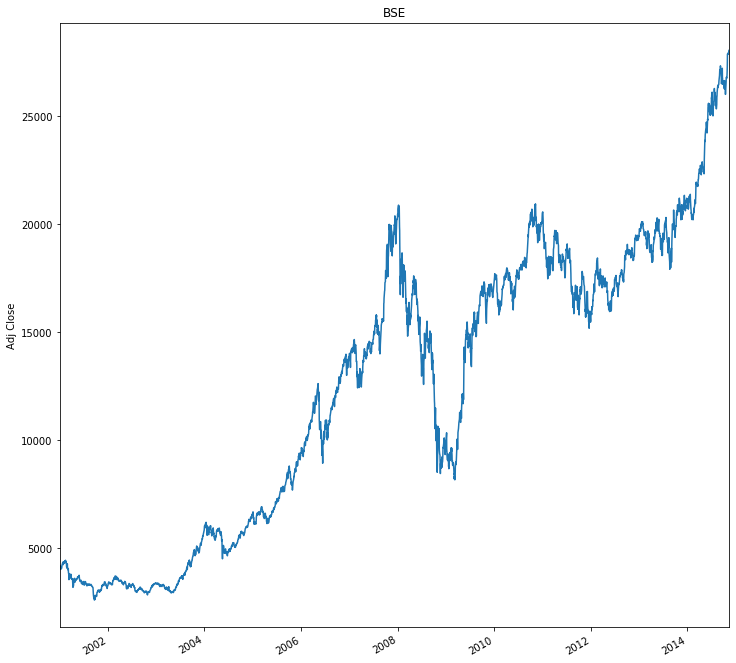

In [30]:
# Let's see a historical view of the closing price
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
data['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("BSE")

Text(0.5, 1.0, 'BSE')

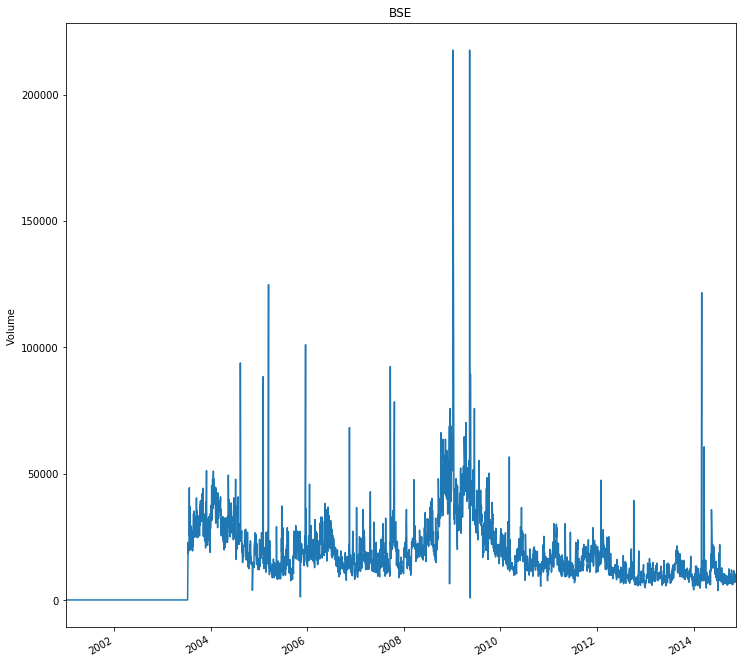

In [32]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

data['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("BSE")

In [34]:
ma_day = [10, 20, 50]

for ma in ma_day:
        column_name = f"MA for {ma} days"
        data[column_name] = data['Adj Close'].rolling(ma).mean()

In [35]:
print(data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA for 10 days',
       'MA for 20 days', 'MA for 50 days'],
      dtype='object')


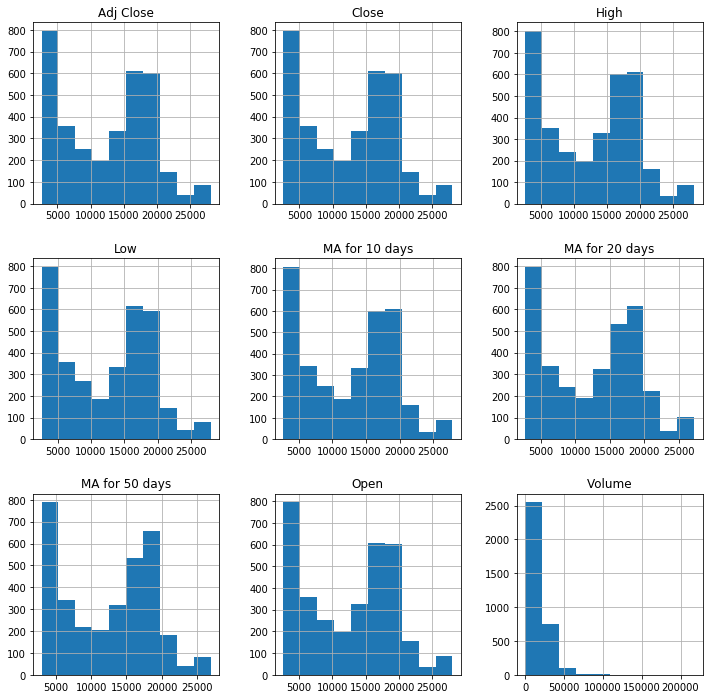

In [37]:
data.hist(figsize=(12, 12));

<Figure size 864x576 with 0 Axes>

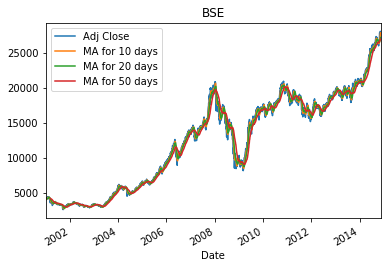

In [47]:
plt.figure(figsize=(12, 8))
data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title('BSE')

fig.tight_layout()

Text(0.5, 1.0, 'BSE')

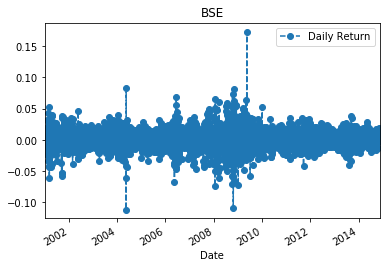

In [49]:
# We'll use pct_change to find the percent change for each day
data['Daily Return'] = data['Adj Close'].pct_change()

# Then we'll plot the daily return percentage)
data['Daily Return'].plot(legend=True, linestyle='--', marker='o')
plt.title('BSE')

Text(0.5, 1.0, 'BSE')

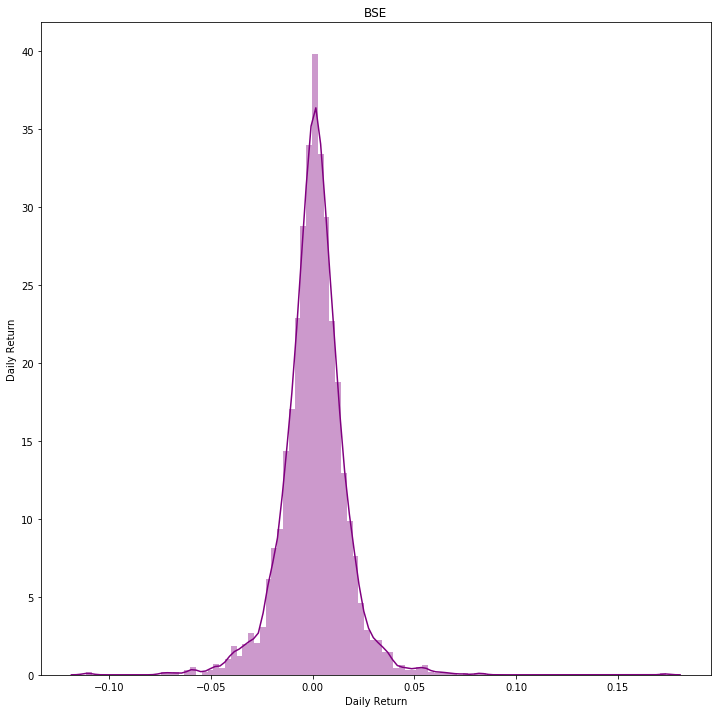

In [50]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

sns.distplot(data['Daily Return'].dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')
plt.title('BSE')
# Could have also done:
#AAPL['Daily Return'].hist()

In [52]:
#Grab all the closing prices for the tech stock list into one DataFrame
closing_df = data['Adj Close']

# Let's take a quick look
closing_df.head() 

Date
2001-01-02    4018.879883
2001-01-03    4060.020020
2001-01-04    4115.370117
2001-01-05    4183.729980
2001-01-08    4120.430176
Name: Adj Close, dtype: float64

In [53]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Date
2001-01-02         NaN
2001-01-03    0.010237
2001-01-04    0.013633
2001-01-05    0.016611
2001-01-08   -0.015130
Name: Adj Close, dtype: float64

In [63]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

IndexError: index -1 is out of bounds for axis 0 with size 0

<Figure size 0x0 with 0 Axes>

In [65]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

TypeError: corr() missing 1 required positional argument: 'other'

TypeError: zip argument #1 must support iteration

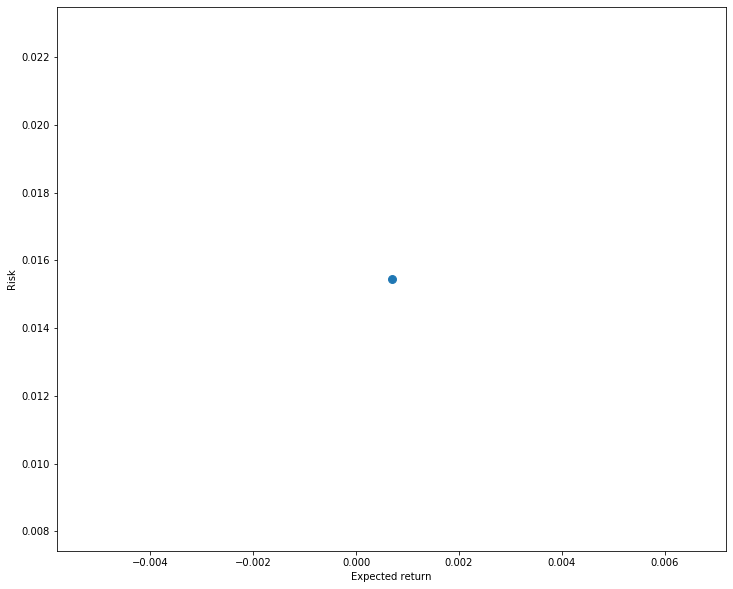

In [72]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [9]:
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data.set_index('Date', inplace=True)

In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [12]:
data.index

DatetimeIndex(['2001-01-02', '2001-01-03', '2001-01-04', '2001-01-05',
               '2001-01-08', '2001-01-09', '2001-01-10', '2001-01-11',
               '2001-01-12', '2001-01-15',
               ...
               '2014-10-30', '2014-10-31', '2014-11-03', '2014-11-05',
               '2014-11-07', '2014-11-10', '2014-11-11', '2014-11-12',
               '2014-11-13', '2014-11-14'],
              dtype='datetime64[ns]', name='Date', length=3419, freq=None)

C:\Users\admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



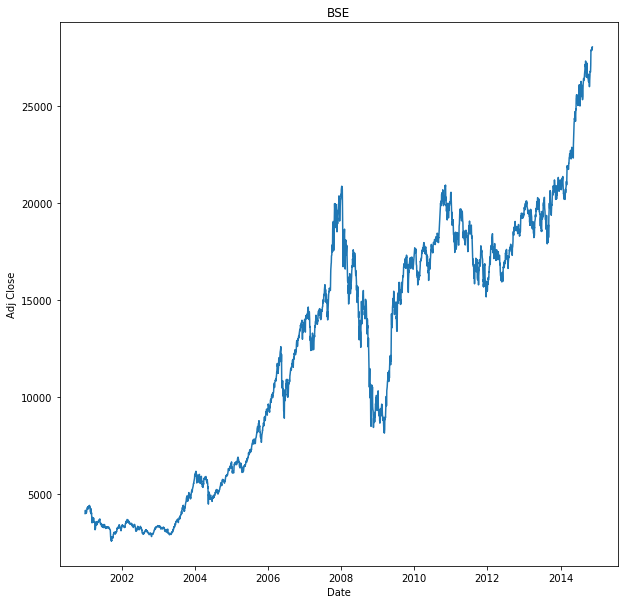

In [13]:
# Let's see a historical view of the closing price
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(data.index.values,
        data['Adj Close'])

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Adj Close",
       title="BSE")

plt.show()

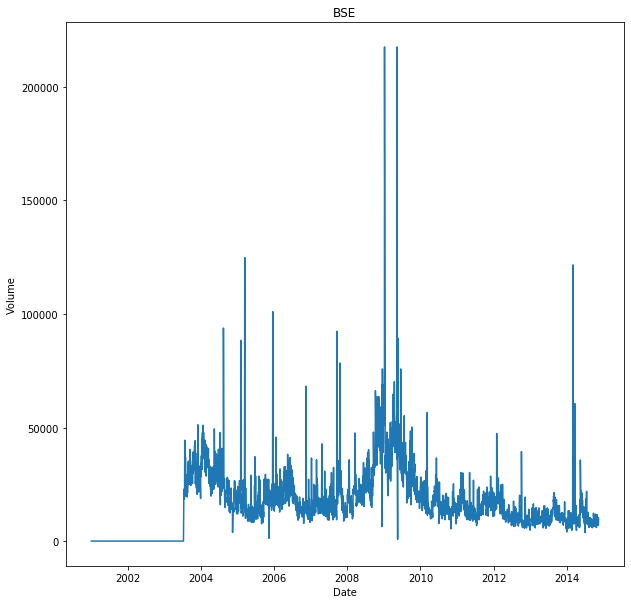

In [14]:
# Now let's plot the total volume of stock being traded each day
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(data.index.values,
        data['Volume'])

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Volume",
       title="BSE")

plt.show()

In [15]:
#data.groupby("Date").hist(figsize=(12, 12));

In [16]:
#plt.scatter(data["Open"],data["Close"],data=data)
#plt.xlabel("Open price")
#plt.ylabel("close Price")

In [17]:
#feature correlation
data1=data[["Open","High","Low"]]
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999881,0.999801,0.999680,0.999680,0.082290
High,0.999881,1.000000,0.999772,0.999845,0.999845,0.085831
Low,0.999801,0.999772,1.000000,0.999864,0.999864,0.077036
Close,0.999680,0.999845,0.999864,1.000000,1.000000,0.081411
Adj Close,0.999680,0.999845,0.999864,1.000000,1.000000,0.081411
Volume,0.082290,0.085831,0.077036,0.081411,0.081411,1.000000


In [18]:
#Data is highly correlated hence it will give us a bad model so use only 1 feature
X=data["Open"].values.reshape(-1,1)

In [19]:
#Label
y=data["Close"]

In [20]:
#train test and split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [22]:
#lets  do the feature scaling for an acurate model
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm.fit(X_train,y_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [23]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_pred=lreg.predict(X_test)
y_pred

array([14441.43836773,  8227.45915145, 19161.85043881, 18285.39868813,
       20254.9605697 ,  7557.55786682, 15828.03406031,  2879.76500164,
       10242.42715768,  9698.27348987, 18742.8250185 ,  3384.24585779,
       15156.80430136, 11540.41009282, 16874.3910596 ,  5871.45361125,
       27073.17912492,  3676.90258502,  5587.63606773,  3620.94011154,
       17571.76991647, 20231.01876823, 17588.08030526,  5665.75173082,
       20033.7276327 , 20897.45451031,  3040.7905894 , 14843.17313758,
        6425.37478514,  4862.20172225, 13711.78889657, 22624.36009725,
       17642.43461305, 19500.97036464, 17168.42673722,  3502.88267346,
       10203.9735772 , 17228.10469652,  5448.63394319, 18740.60894365,
       11622.86036735, 15955.151117  , 19748.40214451,  8409.47965803,
        4973.25760231,  4118.28968327,  6400.38493183, 19466.08279144,
       17462.25173117, 18612.12342091, 14402.52538083,  4151.16015942,
        5610.10893944,  3626.16402945, 17859.28221883, 26991.77738963,
      

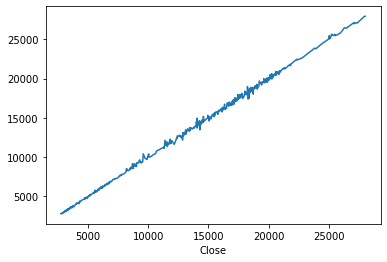

In [25]:
sns.lineplot(y_test,y_pred)

In [26]:
lreg.score(X_test,y_test)  #this High score suspects overfitting of data

0.9993513165204755

In [27]:
len(y_pred)


684

In [ ]:
predicted_prices = pd.DataFrame(columns = ['Close'])
predicted_prices['Close'] = y_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=data.Date, y=df.Close,
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=predicted_prices.Close,
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_test,
                         name='Truth',
                         marker_color='LightSkyBlue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_pred,
                         name='Prediction',
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)

fig.show()